In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import qmc

In [2]:
sampler = qmc.Sobol(d=13, scramble=True, seed=10)
sample = sampler.random(n=512)  #here, n=256=2^8 
sample.shape

(512, 13)

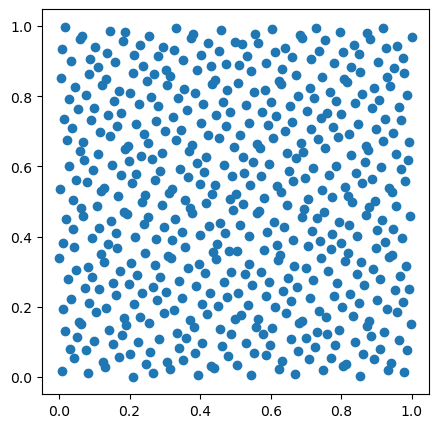

In [7]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(sample[:,0],sample[:,1])

In [8]:
gf = pd.DataFrame(sample)
with pd.ExcelWriter('/g/data/xv83/jp6794/WRF/Exps/Pearse/July_analysis/New_128_runs/Aug_exps/Samples13_512(0-1).xlsx',
                    mode='w') as writer:
    gf.to_excel(writer, sheet_name="QMC_Sobol_sequence", index=False, header=False)

In [9]:
ranges = pd.read_excel('/g/data/xv83/jp6794/WRF/Exps/Pearse/July_analysis/parameter_ranges_redo_latest.xlsx',
                  sheet_name='Sheet1')
ranges['WOMBAT-lite-min'][1]

0.01

In [11]:
%%time
def de_norm(x, i, mini, maxi):
    return (x[:, i]*(maxi - mini)) + mini

model = 'lite'  # mid or lite
if model == 'mid':
    len_par = 48
if model == 'lite':
    len_par = 13
de_norm_samples = np.zeros((512, len_par))
for j in range(len_par):
    de_norm_samples[:, j] = de_norm(sample, j, ranges['WOMBAT-'+str(model)+'-min'][j], ranges['WOMBAT-'+str(model)+'-max'][j])

CPU times: user 2.28 ms, sys: 1.13 ms, total: 3.41 ms
Wall time: 2.49 ms


In [12]:
df = pd.DataFrame(de_norm_samples)
with pd.ExcelWriter('/g/data/xv83/jp6794/WRF/Exps/Pearse/July_analysis/New_128_runs/Aug_exps/Samples13_512.xlsx',
                    mode='w') as writer:
    df.to_excel(writer,sheet_name="QMC_Sobol_sequence",index=False,header=False)

For second manuscript work

(128, 5)


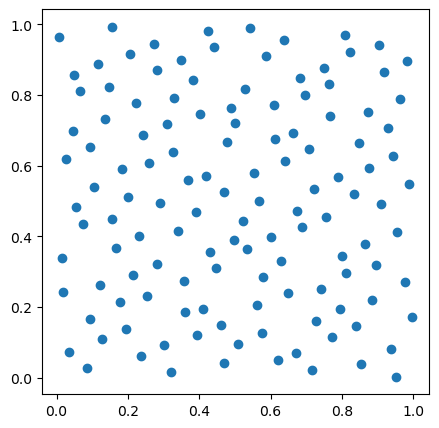

In [9]:
sampler = qmc.Sobol(d=5, scramble=True, seed=38)
sample = sampler.random(n=128)  #here, n=256=2^8 
print(sample.shape)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(sample[:,0],sample[:,1])

In [14]:
gf = pd.DataFrame(sample)
with pd.ExcelWriter('/g/data/xv83/jp6794/WRF/Exps/Pearse/Second_paper/Samples5_128(0-1).xlsx',
                    mode='w') as writer:
    gf.to_excel(writer, sheet_name="QMC_Sobol_sequence", index=False, header=False)

In [22]:
ranges = pd.read_excel('/g/data/xv83/jp6794/WRF/Exps/Pearse/Second_paper/experiments_log.xlsx',
                  sheet_name='Sheet1')
ranges['max']

0    1.250
1    3.000
2   -1.000
3    0.000
4    1.104
Name: max, dtype: float64

In [20]:
%%time
def de_norm(x, i, mini, maxi):
    return (x[:, i]*(maxi - mini)) + mini

de_norm_samples = np.zeros((128, 5))
for j in range(5):
    de_norm_samples[:, j] = de_norm(sample, j, ranges['min'][j], ranges['max'][j])

CPU times: user 797 µs, sys: 0 ns, total: 797 µs
Wall time: 1.46 ms


In [21]:
df = pd.DataFrame(de_norm_samples)
with pd.ExcelWriter('/g/data/xv83/jp6794/WRF/Exps/Pearse/Second_paper/Samples5_128_log.xlsx',
                    mode='w') as writer:
    df.to_excel(writer,sheet_name="QMC_Sobol_sequence",index=False,header=False)